In [51]:
#Importing the different libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [52]:
#Reading the Data
data=pd.read_csv("creditcard.csv")

#Scaling the variable due to large difference in minimum and maximum amount
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

data.drop(['Time'], axis=1, inplace=True)

#Dropping the duplicates in data
data.drop_duplicates(inplace=True)

#Train and test split
X = data.drop('Class', axis = 1).values
y = data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Accuracy of the Naive Bayes model is 0.977817278218127


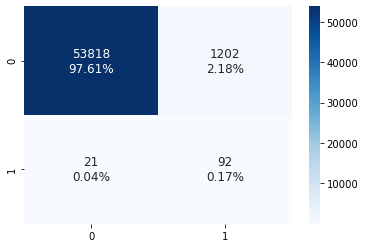

In [53]:
#Train the Model - Naive Bayes

nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
nb_ypred = nbModel.predict(X_test)

print('Accuracy of the Naive Bayes model is {}'.format(accuracy_score(y_test, nb_ypred)))

cm = confusion_matrix(y_test, nb_ypred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues');

Accuracy score of the Decision Tree model is 0.9993107576224766


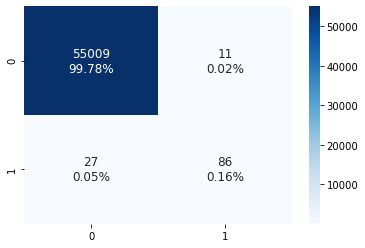

In [54]:
#Train the Model - Decision Tree

DTModel = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
DTModel.fit(X_train, y_train)
dt_ypred = DTModel.predict(X_test)

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_ypred)))

cm = confusion_matrix(y_test, dt_ypred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues');

Accuracy score of the K-Nearest Neighbors model is 0.9994014474089928


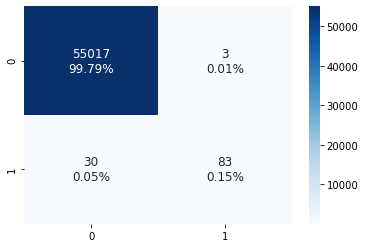

In [55]:
#Train the Model - K-Nearest Neighbors

n = 7
KNNModel = KNeighborsClassifier(n_neighbors = n)
KNNModel.fit(X_train, y_train)
knn_ypred = KNNModel.predict(X_test)

print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_ypred)))

cm = confusion_matrix(y_test, knn_ypred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues');

Accuracy score of the Logistic Regression model is 0.9989479984764116


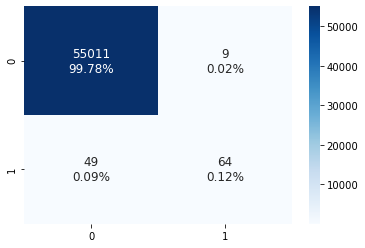

In [56]:
#Train the Model - Logistic Regression

lrModel = LogisticRegression()
lrModel.fit(X_train, y_train)
lr_ypred = lrModel.predict(X_test)

print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_ypred)))

cm = confusion_matrix(y_test, lr_ypred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues');

Accuracy score of the Support Vector Machines model is 0.9992926196651734


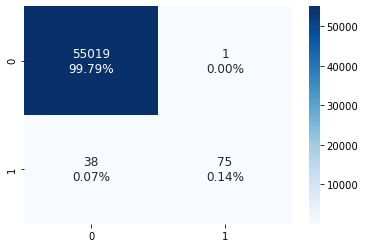

In [57]:
#Train the Model - Support Vector Machines

svmModel = SVC()
svmModel.fit(X_train, y_train)
svm_ypred = svmModel.predict(X_test)

print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_ypred)))

cm = confusion_matrix(y_test, svm_ypred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues');

%Accuracy of the XGBoost model is 0.9994739992382058


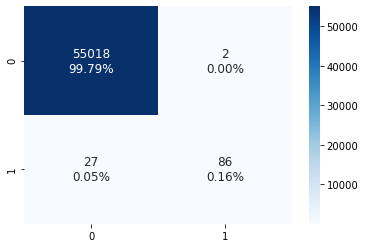

In [58]:
#Train the Model - XGBoost 

xgbModel = XGBClassifier(max_depth = 5)
xgbModel.fit(X_train, y_train)
xgb_ypred = xgbModel.predict(X_test)

print('%Accuracy of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_ypred)))

cm = confusion_matrix(y_test, xgb_ypred)
counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
percents = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = np.asarray([f'{i}\n{j}' for i, j in zip(counts, percents)]).reshape(2, 2)

sns.heatmap(cm, annot=labels, fmt='', annot_kws={'size': 12}, cmap='Blues');